# <div style="text-align: center; background-color: #0C6B44; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">📊**Forecasting on Data Science pollution levels Prediction Dataset**</div>


# Libraries imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm
import seaborn as sns 
import os
from sklearn.model_selection import ParameterGrid
from joblib import Parallel, delayed
import requests
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer,KNNImputer
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.linear_model import ElasticNet,Ridge,Lasso,SGDRegressor,BayesianRidge
from pmdarima.preprocessing import BoxCoxEndogTransformer
from datetime import datetime
import pmdarima as pm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from pmdarima.pipeline import Pipeline
import math 
%matplotlib inline
from utils import *

# EDA

In [2]:
df = pd.read_csv('data/data.csv')

df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.set_index('date')
data = df.sort_index()
print(f'the shape of data :{df.shape}\n')
print('We have data between %s and %s' % (df.index.min(), df.index.max()))
print(df.isnull().sum())
print("if there are any nulls try plot in interval that contain it")

the shape of data :(34896, 2)

We have data between 2013-03-01 00:00:00 and 2017-02-21 23:00:00
PM2.5    1079
exog       14
dtype: int64
if there are any nulls try plot in interval that contain it


In [3]:
data.isnull().sum()

PM2.5    1079
exog       14
dtype: int64

In [4]:
data = build_exog_features(data, 168)

/home/mo2men_ahmed/projects/batch6-workspace/S03 - Time Series/HCKT03 - Time Series Forecasting/utils.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_['exog_lead'+str(i)] = df_.exog.shift(-i)
/home/mo2men_ahmed/projects/batch6-workspace/S03 - Time Series/HCKT03 - Time Series Forecasting/utils.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_['exog_lead'+str(i)] = df_.exog.shift(-i)
/home/mo2men_ahmed/projects/batch6-workspace/S03 - Time Series/HCKT03 - Time Series Forecasting/utils.py:16: PerformanceWarning: DataF

In [5]:
data.head()

,PM2.5,exog,exog_lead1,exog_lead2,exog_lead3,exog_lead4,exog_lead5,exog_lead6,exog_lead7,exog_lead8,...,exog_lead159,exog_lead160,exog_lead161,exog_lead162,exog_lead163,exog_lead164,exog_lead165,exog_lead166,exog_lead167,exog_lead168
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.4,4.7,5.6,3.1,2.0,3.7,2.5,3.8,4.1,...,3.3,1.9,1.4,1.9,1.5,1.5,1.4,1.3,0.1,0.0
2013-03-01 01:00:00,8.0,4.7,5.6,3.1,2.0,3.7,2.5,3.8,4.1,2.6,...,1.9,1.4,1.9,1.5,1.5,1.4,1.3,0.1,0.0,0.9
2013-03-01 02:00:00,7.0,5.6,3.1,2.0,3.7,2.5,3.8,4.1,2.6,3.6,...,1.4,1.9,1.5,1.5,1.4,1.3,0.1,0.0,0.9,0.8
2013-03-01 03:00:00,6.0,3.1,2.0,3.7,2.5,3.8,4.1,2.6,3.6,3.7,...,1.9,1.5,1.5,1.4,1.3,0.1,0.0,0.9,0.8,0.0
2013-03-01 04:00:00,3.0,2.0,3.7,2.5,3.8,4.1,2.6,3.6,3.7,5.1,...,1.5,1.5,1.4,1.3,0.1,0.0,0.9,0.8,0.0,1.0


In [6]:
# data['PM2.5'].plot()

In [7]:
# tools.check_lossed_dates(data,how='h')

In [8]:
data[data.exog.isnull()].exog

date
2015-01-27 20:00:00   NaN
2015-02-18 07:00:00   NaN
2016-09-25 19:00:00   NaN
2016-09-25 20:00:00   NaN
2016-09-25 21:00:00   NaN
2016-09-25 22:00:00   NaN
2016-09-25 23:00:00   NaN
2017-01-19 03:00:00   NaN
2017-01-19 04:00:00   NaN
2017-01-19 05:00:00   NaN
2017-01-19 06:00:00   NaN
2017-01-19 07:00:00   NaN
2017-01-27 13:00:00   NaN
2017-01-27 14:00:00   NaN
Name: exog, dtype: float64

In [9]:
data[data['PM2.5'].isnull()]['PM2.5']

date
2013-05-02 21:00:00   NaN
2013-05-16 13:00:00   NaN
2013-06-07 16:00:00   NaN
2013-06-25 01:00:00   NaN
2013-06-26 00:00:00   NaN
                       ..
2017-02-21 19:00:00   NaN
2017-02-21 20:00:00   NaN
2017-02-21 21:00:00   NaN
2017-02-21 22:00:00   NaN
2017-02-21 23:00:00   NaN
Name: PM2.5, Length: 1079, dtype: float64

# Searching for linearity and seasonality

<AxesSubplot: xlabel='date'>

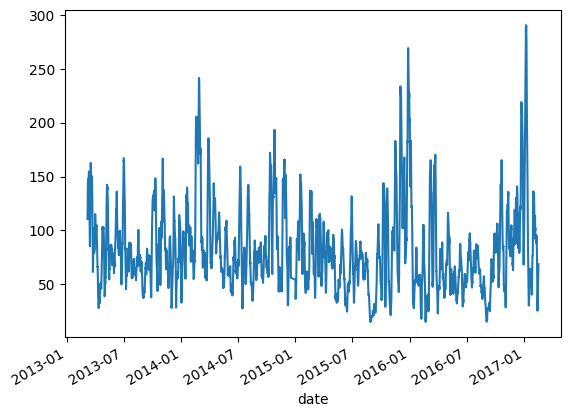

In [10]:
#trending 
data["PM2.5"].dropna().rolling(168).mean().plot()

/home/mo2men_ahmed/.virtualenvs/S03/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


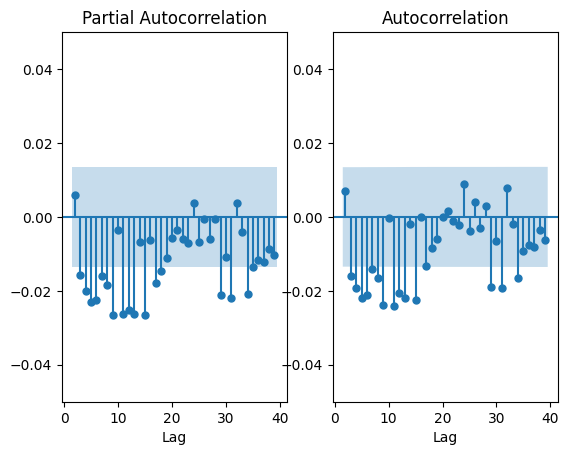

In [11]:
data_copy = data.copy()
data_log = np.log(data_copy)
data_log_detrend = data_log.diff()
data_detrend_without_nans =  data_log_detrend.dropna()
fig, ax = plt.subplots(1,2)
plot_pacf(data_detrend_without_nans["PM2.5"], alpha=.05, lags=[i for i in range(2,40)], ax=ax[0], method='ols') 
plot_acf(data_detrend_without_nans["PM2.5"], alpha=.05, lags=[i for i in range(2,40)], ax=ax[1])
ax[0].set_xlabel('Lag')
ax[1].set_xlabel('Lag')
ax[0].set_ylim([-.05,.05])
ax[1].set_ylim([-.05,.05])
plt.show()

# Spliting the data

In [12]:
train = data.iloc[:-336]
val = data.iloc[-336:-168]
train_val = data.iloc[:-168]
test = data.iloc[-168:]

In [13]:
val[val['PM2.5'].isnull()]['PM2.5']

date
2017-02-09 03:00:00   NaN
Name: PM2.5, dtype: float64

# Filling the nulls 

In [14]:
imputer_train = KNNImputer() 
train_imputed = imputer_train.fit_transform(train) 

In [15]:
train_imputed = pd.DataFrame(train_imputed,index=train.index,columns = train.columns)

In [16]:
train_imputed

,PM2.5,exog,exog_lead1,exog_lead2,exog_lead3,exog_lead4,exog_lead5,exog_lead6,exog_lead7,exog_lead8,...,exog_lead159,exog_lead160,exog_lead161,exog_lead162,exog_lead163,exog_lead164,exog_lead165,exog_lead166,exog_lead167,exog_lead168
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.4,4.7,5.6,3.1,2.0,3.7,2.5,3.8,4.1,...,3.3,1.9,1.4,1.9,1.5,1.5,1.4,1.3,0.1,0.0
2013-03-01 01:00:00,8.0,4.7,5.6,3.1,2.0,3.7,2.5,3.8,4.1,2.6,...,1.9,1.4,1.9,1.5,1.5,1.4,1.3,0.1,0.0,0.9
2013-03-01 02:00:00,7.0,5.6,3.1,2.0,3.7,2.5,3.8,4.1,2.6,3.6,...,1.4,1.9,1.5,1.5,1.4,1.3,0.1,0.0,0.9,0.8
2013-03-01 03:00:00,6.0,3.1,2.0,3.7,2.5,3.8,4.1,2.6,3.6,3.7,...,1.9,1.5,1.5,1.4,1.3,0.1,0.0,0.9,0.8,0.0
2013-03-01 04:00:00,3.0,2.0,3.7,2.5,3.8,4.1,2.6,3.6,3.7,5.1,...,1.5,1.5,1.4,1.3,0.1,0.0,0.9,0.8,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-07 19:00:00,110.0,1.2,1.3,0.8,0.4,0.0,0.2,0.0,1.2,1.7,...,1.4,1.4,1.9,1.3,1.3,1.3,2.0,1.7,1.2,1.1
2017-02-07 20:00:00,118.0,1.3,0.8,0.4,0.0,0.2,0.0,1.2,1.7,1.6,...,1.4,1.9,1.3,1.3,1.3,2.0,1.7,1.2,1.1,0.2
2017-02-07 21:00:00,107.0,0.8,0.4,0.0,0.2,0.0,1.2,1.7,1.6,1.8,...,1.9,1.3,1.3,1.3,2.0,1.7,1.2,1.1,0.2,1.0


In [17]:
prepare_for_prediction(train_imputed,168,25,0,True,True,target='PM2.5',rolling = [np.mean,np.std],holidays=False)[0]

,PM2.5,exog,exog_lead1,exog_lead2,exog_lead3,exog_lead4,exog_lead5,exog_lead6,exog_lead7,exog_lead8,...,lagged_22,lagged_23,lagged_24,lagged_25,rolling_<function mean at 0x7f924c200670>,rolling_<function std at 0x7f924c200820>,sin_weekday,cos_weekday,sin_month,cos_month
date,,,,,,,,,,,,,,,,,,,,,
2013-03-02 01:00:00,14.0,1.1,1.7,1.4,0.9,2.0,0.7,1.2,1.8,1.7,...,6.0,7.0,8.0,4.0,7.961538,5.779140,-0.974928,-0.222521,1.0,6.123234e-17
2013-03-02 02:00:00,13.0,1.7,1.4,0.9,2.0,0.7,1.2,1.8,1.7,1.6,...,3.0,6.0,7.0,8.0,8.148148,5.749272,-0.974928,-0.222521,1.0,6.123234e-17
2013-03-02 03:00:00,3.0,1.4,0.9,2.0,0.7,1.2,1.8,1.7,1.6,3.1,...,5.0,3.0,6.0,7.0,7.964286,5.725072,-0.974928,-0.222521,1.0,6.123234e-17
2013-03-02 04:00:00,3.0,0.9,2.0,0.7,1.2,1.8,1.7,1.6,3.1,2.7,...,3.0,5.0,3.0,6.0,7.793103,5.696987,-0.974928,-0.222521,1.0,6.123234e-17
2013-03-02 05:00:00,9.0,2.0,0.7,1.2,1.8,1.7,1.6,3.1,2.7,1.5,...,3.0,3.0,5.0,3.0,7.833333,5.602237,-0.974928,-0.222521,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-31 19:00:00,91.0,1.8,0.9,1.7,2.9,1.5,2.3,3.0,1.5,1.8,...,57.0,64.0,71.0,126.0,134.369048,147.936730,0.781831,0.623490,0.5,8.660254e-01
2017-01-31 20:00:00,73.0,0.9,1.7,2.9,1.5,2.3,3.0,1.5,1.8,1.8,...,59.0,57.0,64.0,71.0,134.005952,148.012481,0.781831,0.623490,0.5,8.660254e-01
2017-01-31 21:00:00,24.0,1.7,2.9,1.5,2.3,3.0,1.5,1.8,1.8,0.9,...,70.0,59.0,57.0,64.0,133.386905,148.255037,0.781831,0.623490,0.5,8.660254e-01


In [18]:
imputer_val = KNNImputer() 
val_imputed = val.fillna(method='bfill')

In [19]:
val_imputed = pd.DataFrame(val_imputed,index=val.index,columns = val.columns)

# Running a Best model 

In [20]:
predictions = predict_n_periods(series_=train_imputed, 
                  n_periods=168, 
                  model=LinearRegression(), 
                  num_periods_lagged=6,
                  num_periods_diffed=0,
                                weekday=True,month=True,
                  rolling = [np.mean,np.std]
                 
                  
                  ,target = "PM2.5"
                  )


  0%|          | 0/168 [00:00<?, ?it/s]

# Evaluation 

In [21]:
test_mae = mean_absolute_error(val_imputed['PM2.5'],predictions)
print(test_mae)

41.03591334912112


# Trying sarimax

In [24]:
df = pd.read_csv('data/data.csv')

df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.set_index('date')
data = df.sort_index()
print(f'the shape of data :{df.shape}\n')
print('We have data between %s and %s' % (df.index.min(), df.index.max()))
print(df.isnull().sum())
print("if there are any nulls try plot in interval that contain it")

the shape of data :(34896, 2)

We have data between 2013-03-01 00:00:00 and 2017-02-21 23:00:00
PM2.5    1079
exog       14
dtype: int64
if there are any nulls try plot in interval that contain it


In [25]:
exog = data[["exog"]]
data= data[["PM2.5"]]
data

,PM2.5
date,
2013-03-01 00:00:00,4.0
2013-03-01 01:00:00,8.0
2013-03-01 02:00:00,7.0
2013-03-01 03:00:00,6.0
2013-03-01 04:00:00,3.0
...,...
2017-02-21 19:00:00,NaN
2017-02-21 20:00:00,NaN
2017-02-21 21:00:00,NaN


In [26]:
exog

,exog
date,
2013-03-01 00:00:00,4.4
2013-03-01 01:00:00,4.7
2013-03-01 02:00:00,5.6
2013-03-01 03:00:00,3.1
2013-03-01 04:00:00,2.0
...,...
2017-02-21 19:00:00,1.4
2017-02-21 20:00:00,1.5
2017-02-21 21:00:00,1.1


In [27]:
train = data.iloc[:-336]
val = data.iloc[-336:-168]
train_val = data.iloc[:-168]
test = data.iloc[-168:]
exog_train = exog.iloc[:-336]
exog_val = exog.iloc[-336:-168]
exog_train_val = exog.iloc[:-168]
exog_test = exog.iloc[-168:]

In [28]:
train.isnull().sum()

PM2.5    910
dtype: int64

In [29]:
train.isnull().sum()

PM2.5    910
dtype: int64

In [30]:
imputer_train = KNNImputer() 
imputer_exog = KNNImputer() 
train_imputed = imputer_train.fit_transform(train) 
exog_imputed = exog_train.fillna(method='bfill')

In [31]:
sarimax_pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           
                           method='nm', 
                           maxiter=20, 
                          )
    )
])

sarimax_pipeline.fit(train_imputed,exog_imputed)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=132285.086, Time=9.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=159307.386, Time=8.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=90695.813, Time=8.80 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=137245.082, Time=9.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=200964.292, Time=8.83 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=96565.981, Time=8.54 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=96545.176, Time=8.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=102318.548, Time=8.35 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=74779.035, Time=7.46 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=91279.164, Time=8.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=101070.746, Time=7.78 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=169309.781, Time=7.84 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=97860.017, Time=9.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 110.553 seconds


Pipeline(steps=[('boxcox', BoxCoxEndogTransformer(lmbda2=1e-06)),
                ('arima', AutoARIMA(maxiter=20, method='nm', trace=True))])

# Plotting the distribution of the prediction

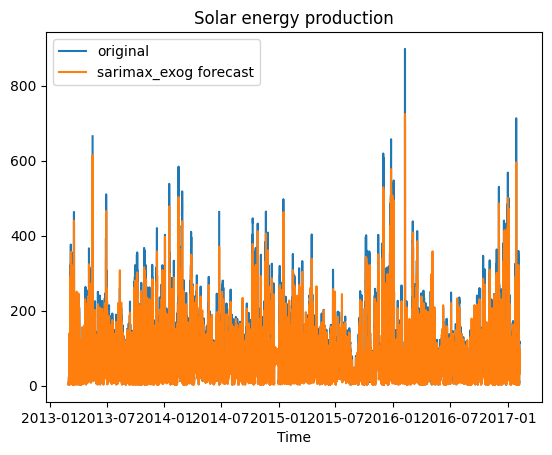

In [32]:
plt.plot(train, label='original')
plt.plot(train.index, sarimax_pipeline.predict_in_sample(exog_imputed), label='sarimax_exog forecast')
plt.xlabel('Time')
plt.title('Solar energy production')
plt.legend()
plt.show()

In [33]:
imputer_val = KNNImputer() 
imputer_exog_val = KNNImputer() 
val_imputed = imputer_val.fit_transform(val) 
exog_imputed_val = exog_val.fillna(method='bfill')

In [34]:
preds = sarimax_pipeline.predict(168,exog_imputed_val)

# Evaluation 

In [36]:
mean_absolute_error(preds,val_imputed)

64.2349285898442